
# Mínimos cuadrados


In [1]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

# Conjunto de datos de ejemplo

In [ ]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

In [3]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

[01-08 11:54:04][INFO] 2026-01-08 11:54:04.211383
[01-08 11:54:04][INFO] 2026-01-08 11:54:04.254848
[01-08 11:54:04][INFO] Se ajustarán 2 parámetros.
[01-08 11:54:04][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


[01-08 11:54:12][INFO] Se ajustarán 2 parámetros.
[01-08 11:54:12][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


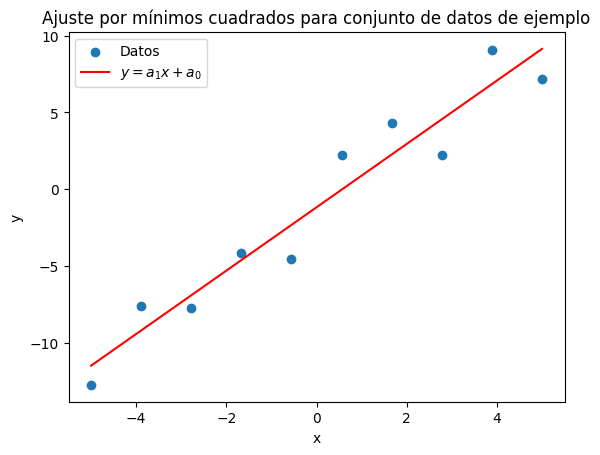

In [4]:
import numpy as np
import matplotlib.pyplot as plt

m, b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

x = np.linspace(-5, 5, 100)

y = [m * xi + b for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos de ejemplo")
plt.legend()
plt.show()

## Conjunto de datos 1

In [5]:
import numpy as np

xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]




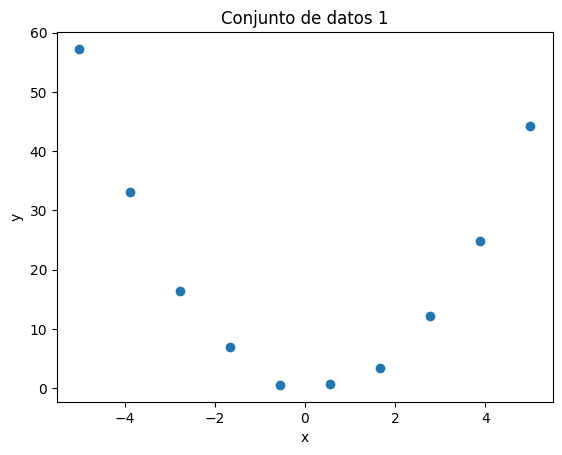

In [6]:
plt.scatter(xs1, ys1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

**Solucion:**

[01-08 12:00:52][INFO] Se ajustarán 3 parámetros.
[01-08 12:00:52][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[01-08 12:00:52][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
Ecuación cuadrática:
y = 2.024410482925083 * x^2 + -1.123325129575543 * x + -0.6382556172537739
Coeficientes del ajuste cuadrático:
a2 = 2.024410482925083
a1 = -1.123325129575543
a0 = -0.6382556172537739

Valores de y para x = 2.25 y x = -2.25:
y(2.25) = 7.082840911009486
y(-2.25) = 12.13780399409943

Grafico del ajuste cuadrático


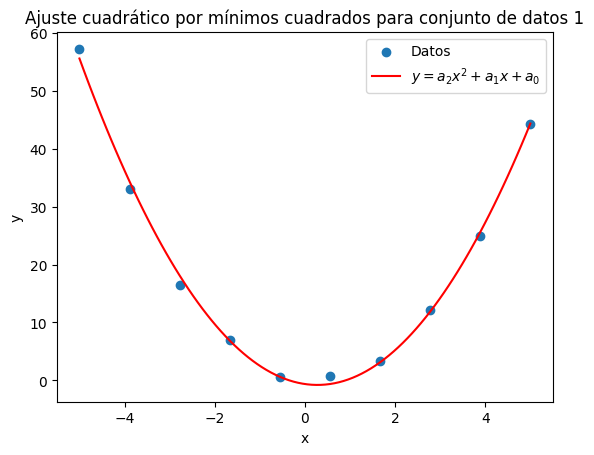

In [8]:
from sympy import symbols, Eq, solve

def coef_parcial_cuad_2(xvals: list, yvals: list) -> tuple[float, float, float, float]:
    coef2 = sum(x**2 for x in xvals)
    coef1 = sum(xvals)
    coef0 = len(xvals)
    indep = sum(yvals)
    return (coef2, coef1, coef0, indep)

def coef_parcial_cuad_1(xvals: list, yvals: list) -> tuple[float, float, float, float]:
    coef2 = sum(x**3 for x in xvals)
    coef1 = sum(x**2 for x in xvals)
    coef0 = sum(xvals)
    indep = sum(x * y for x, y in zip(xvals, yvals))
    return (coef2, coef1, coef0, indep)

def coef_parcial_cuad_0(xvals: list, yvals: list) -> tuple[float, float, float, float]:
    coef2 = sum(x**4 for x in xvals)
    coef1 = sum(x**3 for x in xvals)
    coef0 = sum(x**2 for x in xvals)
    indep = sum((x**2) * y for x, y in zip(xvals, yvals))
    return (coef2, coef1, coef0, indep)

# Ajuste cuadrático usando los nuevos nombres de funciones
parametros = ajustar_min_cuadrados(xs1, ys1, gradiente=[coef_parcial_cuad_0, coef_parcial_cuad_1, coef_parcial_cuad_2])

x_sym = symbols('x')
ecuacion = Eq(parametros[0] * x_sym**2 + parametros[1] * x_sym + parametros[2], 2.25)
raices = solve(ecuacion, x_sym)

# Definir la ecuación cuadrática como solucion
print("Ecuación cuadrática:")
print(f"y = {parametros[0]} * x^2 + {parametros [1]} * x + {parametros[2]}")

# Visualizar primero los coeficientes a2, a1, a0
print("Coeficientes del ajuste cuadrático:")
print(f"a2 = {parametros[0]}")
print(f"a1 = {parametros[1]}")
print(f"a0 = {parametros[2]}")

# Visualizar los valores de y para x = 2.25 y x = -2.25
print("\nValores de y para x = 2.25 y x = -2.25:")
print(f"y(2.25) = {parametros[0] * 2.25**2 + parametros[1] * 2.25 + parametros[2]}")
print(f"y(-2.25) = {parametros[0] * (-2.25)**2 + parametros[1] * (-2.25) + parametros[2]}")

x1 = np.linspace(-5, 5, 100)
y1 = [parametros[0] * xi**2 + parametros[1] * xi + parametros[2] for xi in x1]

print("\nGrafico del ajuste cuadrático")
plt.scatter(xs1, ys1, label="Datos")
plt.plot(x1, y1, color="red", label=r"$ y = a_2 x^2 + a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste cuadrático por mínimos cuadrados para conjunto de datos 1")
plt.legend()
plt.show()



## Conjunto de datos 2

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, exp

xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]




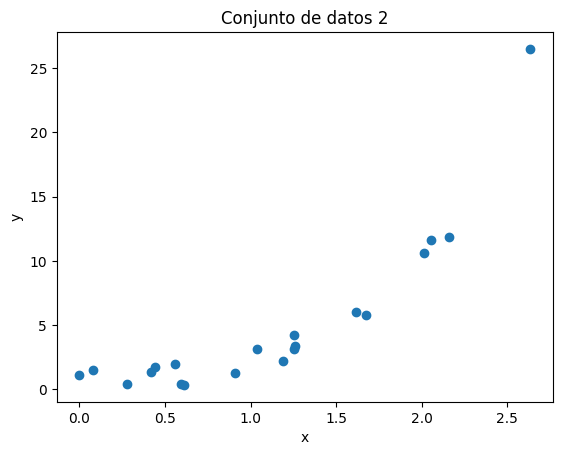

In [10]:
plt.scatter(xs2, ys2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2")
plt.show()

**Solucion:**

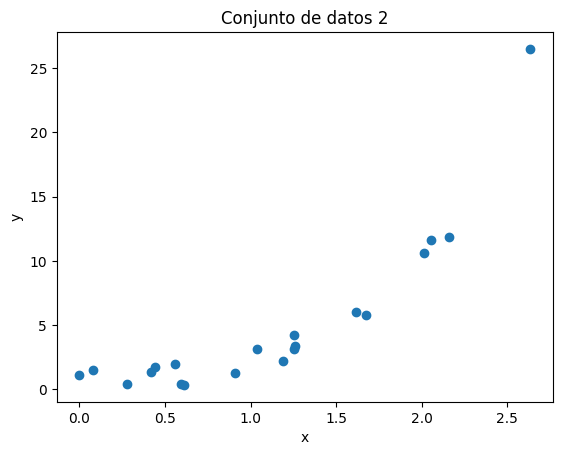

[01-08 12:01:17][INFO] Se ajustarán 2 parámetros.
[01-08 12:01:17][INFO] 
[[22.0372     20.         19.05727035]
 [ 0.         -9.57184451  5.82589171]]
a = 1.4171603667055426
b = -0.6086488040189685
y(5) = 650.1174439111677
y(1) = 2.244564605375951

Grafico del ajuste exponencial


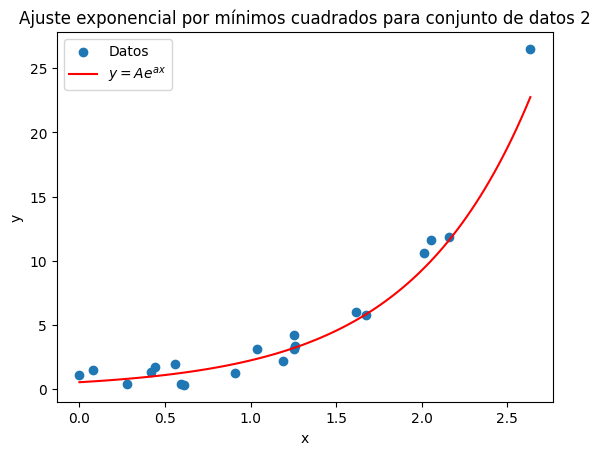

In [11]:
# Derivadas parciales para regresión lineal
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    c_ind = sum(ys)
    c_1 = sum(xs)
    c_0 = len(xs)
    return (c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        c_ind += xi * yi
        c_1 += xi * xi
        c_0 += xi
    return (c_1, c_0, c_ind)

from src import ajustar_min_cuadrados  # no modificar esta función
# Derivadas parciales para ajuste cuadrático (nombres diferentes)
def der_parcial_2_quad(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1_quad(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xs)
    c_ind = sum(xi * yi for xi, yi in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_0_quad(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    c_ind = sum(xi**2 * yi for xi, yi in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

# Conjunto de datos 2 (exponencial)
xs2 = [
    0.0003, 0.0822, 0.2770, 0.4212, 0.4403, 0.5588, 0.5943, 0.6134, 0.9070, 1.0367,
    1.1903, 1.2511, 1.2519, 1.2576, 1.6165, 1.6761, 2.0114, 2.0557, 2.1610, 2.6344,
]
ys2 = [
    1.1017, 1.5021, 0.3844, 1.3251, 1.7206, 1.9453, 0.3894, 0.3328, 1.2887, 3.1239,
    2.1778, 3.1078, 4.1856, 3.3640, 6.0330, 5.8088, 10.5890, 11.5865, 11.8221, 26.5077,
]

plt.scatter(xs2, ys2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2")
plt.show()

# Ajuste exponencial: y = A * exp(a * x)
pars2 = ajustar_min_cuadrados(xs2, np.log(ys2), gradiente=[der_parcial_0, der_parcial_1])

a, b = pars2
A = np.exp(b)

print(f"a = {a}")
print(f"b = {b}")
print(f"y(5) = {A * np.exp(a * 5)}")
print(f"y(1) = {A * np.exp(a * 1)}")

x2 = np.linspace(min(xs2), max(xs2), 100)
y2 = [A * np.exp(a * xi) for xi in x2]

print("\nGrafico del ajuste exponencial")
plt.scatter(xs2, ys2, label="Datos")
plt.plot(x2, y2, color="red", label=r"$ y = A e^{ax} $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste exponencial por mínimos cuadrados para conjunto de datos 2")
plt.legend()
plt.show()